<a href="https://colab.research.google.com/github/omaralsabbah/Python-/blob/main/census_income_data_classification_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to predict where the income of an individual exceeds 50K per year or not , depending on census data 


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
#importing data sets 

data=pd.read_csv("/content/adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#initial exploration of the data 
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

no null values are found in the data set 

In [6]:
#showing summary for the numerical values in the data set 
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#income is our target 
#showing distribution of [income] in our data 
print(data["income"].value_counts())
print(data["income"].value_counts(normalize=True))

<=50K    24720
>50K      7841
Name: income, dtype: int64
<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


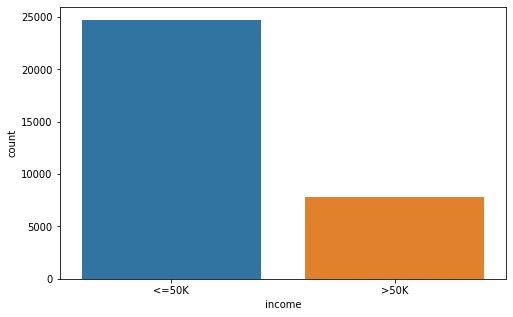

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data['income'],label="Count")
plt.show()

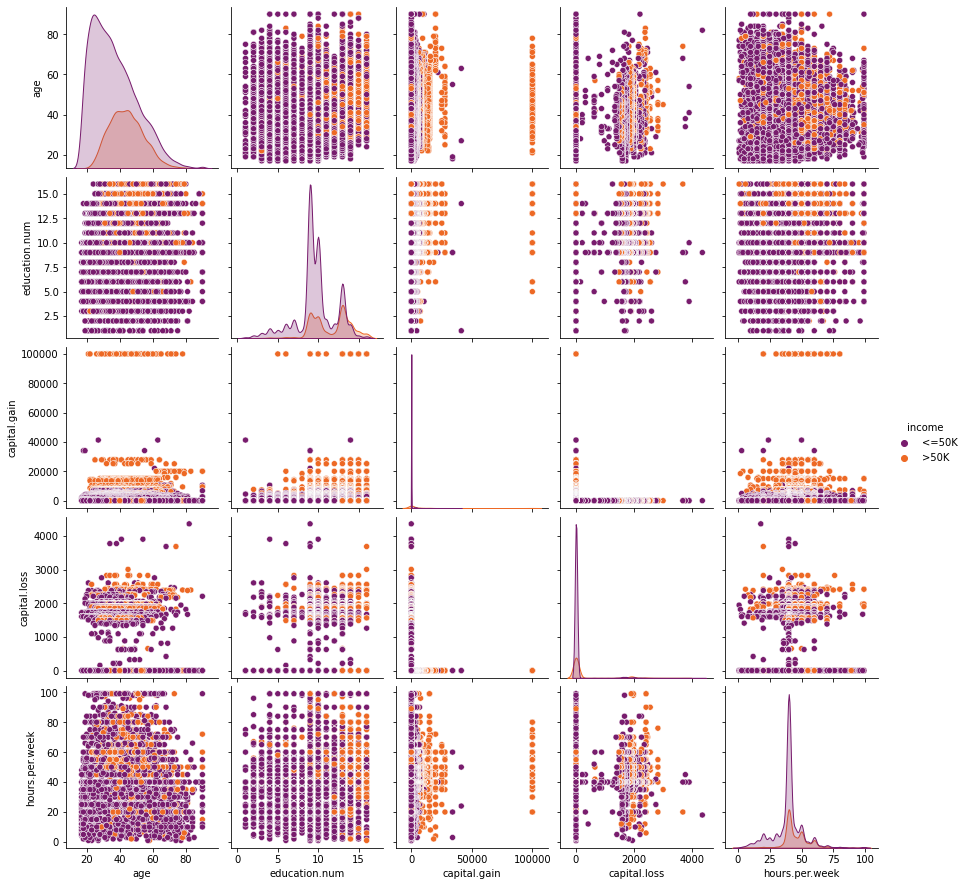

In [35]:
sns.pairplot(data, hue = 'income', palette = 'inferno')

In [ ]:
data["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

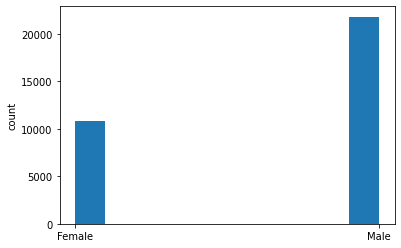

In [15]:
plt.hist(data['sex'])
plt.ylabel('count')
plt.show()

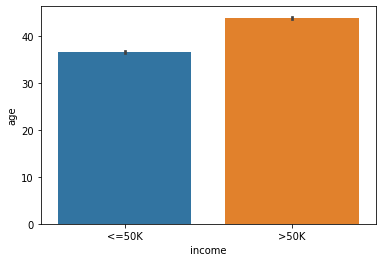

In [34]:
sns.barplot(x = 'income', y = 'age', data = data)

In [22]:
data["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

 null values are noticed in the data set as ( " ? " )

In [23]:
#finding null values in all columns 
for c in data.columns:

  print("{}:".format(c),data[c].isin(["?"]).sum())


age: 0
workclass: 1836
fnlwgt: 0
education: 0
education.num: 0
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital.gain: 0
capital.loss: 0
hours.per.week: 0
native.country: 583
income: 0


In [24]:
data.replace("?",np.NaN,inplace=True)

In [25]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

deleting these null values since they are categorical data and it is hard to fill or replace them 


In [26]:
data=data.dropna()
data.shape

(30162, 15)

In [27]:
data.isna().sum()
# now we do not have null values 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [28]:
#deleting some of the features that are not useful 
data=data.drop(["education","fnlwgt"],axis=1)
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


education is not needed since we have educaiton.num columns and it is enough and " fnlwgt " is a very discrete feature and may confuse the model it is not an understood feature 

In [29]:
#data preprocessing
Numerical=["age","education.num","capital.gain","capital.loss","hours.per.week"]
Categorical = ["workclass","marital.status","occupation","relationship","race","sex","native.country"]

data_encoded=pd.get_dummies(data,columns=Categorical,drop_first=True)

X=data_encoded.drop("income",axis=1)
y=data_encoded["income"]
y.replace("<=50K","1",inplace=True)
y.replace(">50K","0",inplace=True)



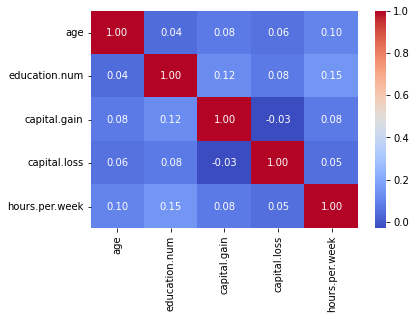

In [31]:
g = sns.heatmap(data_encoded[["age","education.num","capital.gain","capital.loss","hours.per.week","income"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [ ]:
#splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
y_test.shape, y_train.shape

((7541,), (22621,))

In [ ]:
#scaling numerical values

Sc= StandardScaler()
X_train[Numerical]=Sc.fit_transform(X_train[Numerical])
X_test[Numerical]=Sc.transform(X_test[Numerical])

In [ ]:
#defining the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

y_pred=forest.predict(X_test)
y_pred

array(['1', '0', '1', ..., '0', '1', '1'], dtype=object)

In [ ]:
#evaluating first model
print("Accuracy Score =",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("f1_score=",f1_score(y_test,y_pred,pos_label="1"))

Accuracy Score = 0.8485611987800027
confusion matrix:
 [[1228  673]
 [ 469 5171]]
f1_score= 0.9005572971090213


In [ ]:
KNN=KNeighborsClassifier(n_neighbors=15,p=2,metric="minkowski")
KNN.fit(X_train, y_train)
y_pred2=KNN.predict(X_test)

In [ ]:
#evaluating KNN model
print("Accuracy Score =",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred2))
print("f1_score=",f1_score(y_test,y_pred2,pos_label="1"))

Accuracy Score = 0.8436546877072006
confusion matrix:
 [[1196  705]
 [ 474 5166]]
f1_score= 0.8975762314308053


In [ ]:
LR=LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train,y_train)
y_pred3=LR.predict(X_test)

In [ ]:
#evaluating LR model
print("Accuracy Score =",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred3))
print("f1_score=",f1_score(y_test,y_pred3,pos_label="1"))

Accuracy Score = 0.8482959819652566
confusion matrix:
 [[1157  744]
 [ 400 5240]]
f1_score= 0.9015829318651066
